# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [ ]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/TC1002S"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [ ]:
# Import the packages that we will be using

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing data

In [ ]:
# Define the col names for the iris dataset

# Dataset url
url = "/datasets/iris/iris.csv"

# Load the dataset
df= pd.read_csv(Ruta + url)


In [ ]:
df=df.rename(columns={"variety":"type"})
df=df.rename(columns={"petal.width":"petal_width"})
df=df.rename(columns={"petal.length":"petal_length"})
df=df.rename(columns={"sepal.width":"sepal_width"})
df=df.rename(columns={"sepal.length":"sepal_length"})

df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width', 'type'],
      dtype='object')

# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,type,cluster
0,0,0,5.1,3.5,1.4,0.2,Setosa,1
1,1,1,4.9,3.0,1.4,0.2,Setosa,1
2,2,2,4.7,3.2,1.3,0.2,Setosa,1
3,3,3,4.6,3.1,1.5,0.2,Setosa,1
4,4,4,5.0,3.6,1.4,0.2,Setosa,1


2. Drop rows with any missing values


In [ ]:
#

3. Encoding the class label categorical column: from string to num


In [ ]:
# Encoding the categorical column

## Paso 1: Codificar la columna type en valores numéricos
df['type'] = df['type'].astype('category').cat.codes

#Visualize the dataset
df.tail()

,Unnamed: 0.1,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,type,cluster
145,145,145,6.7,3.0,5.2,2.3,2,2
146,146,146,6.3,2.5,5.0,1.9,2,0
147,147,147,6.5,3.0,5.2,2.0,2,2
148,148,148,6.2,3.4,5.4,2.3,2,2
149,149,149,5.9,3.0,5.1,1.8,2,0


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# # Drop out non necesary columns
if 'Unnamed: 0.1' in df.columns:
    df.drop('Unnamed: 0.1',axis='columns',inplace=True)
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0',axis='columns',inplace=True)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,type,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


5. Scatter plot of the data

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


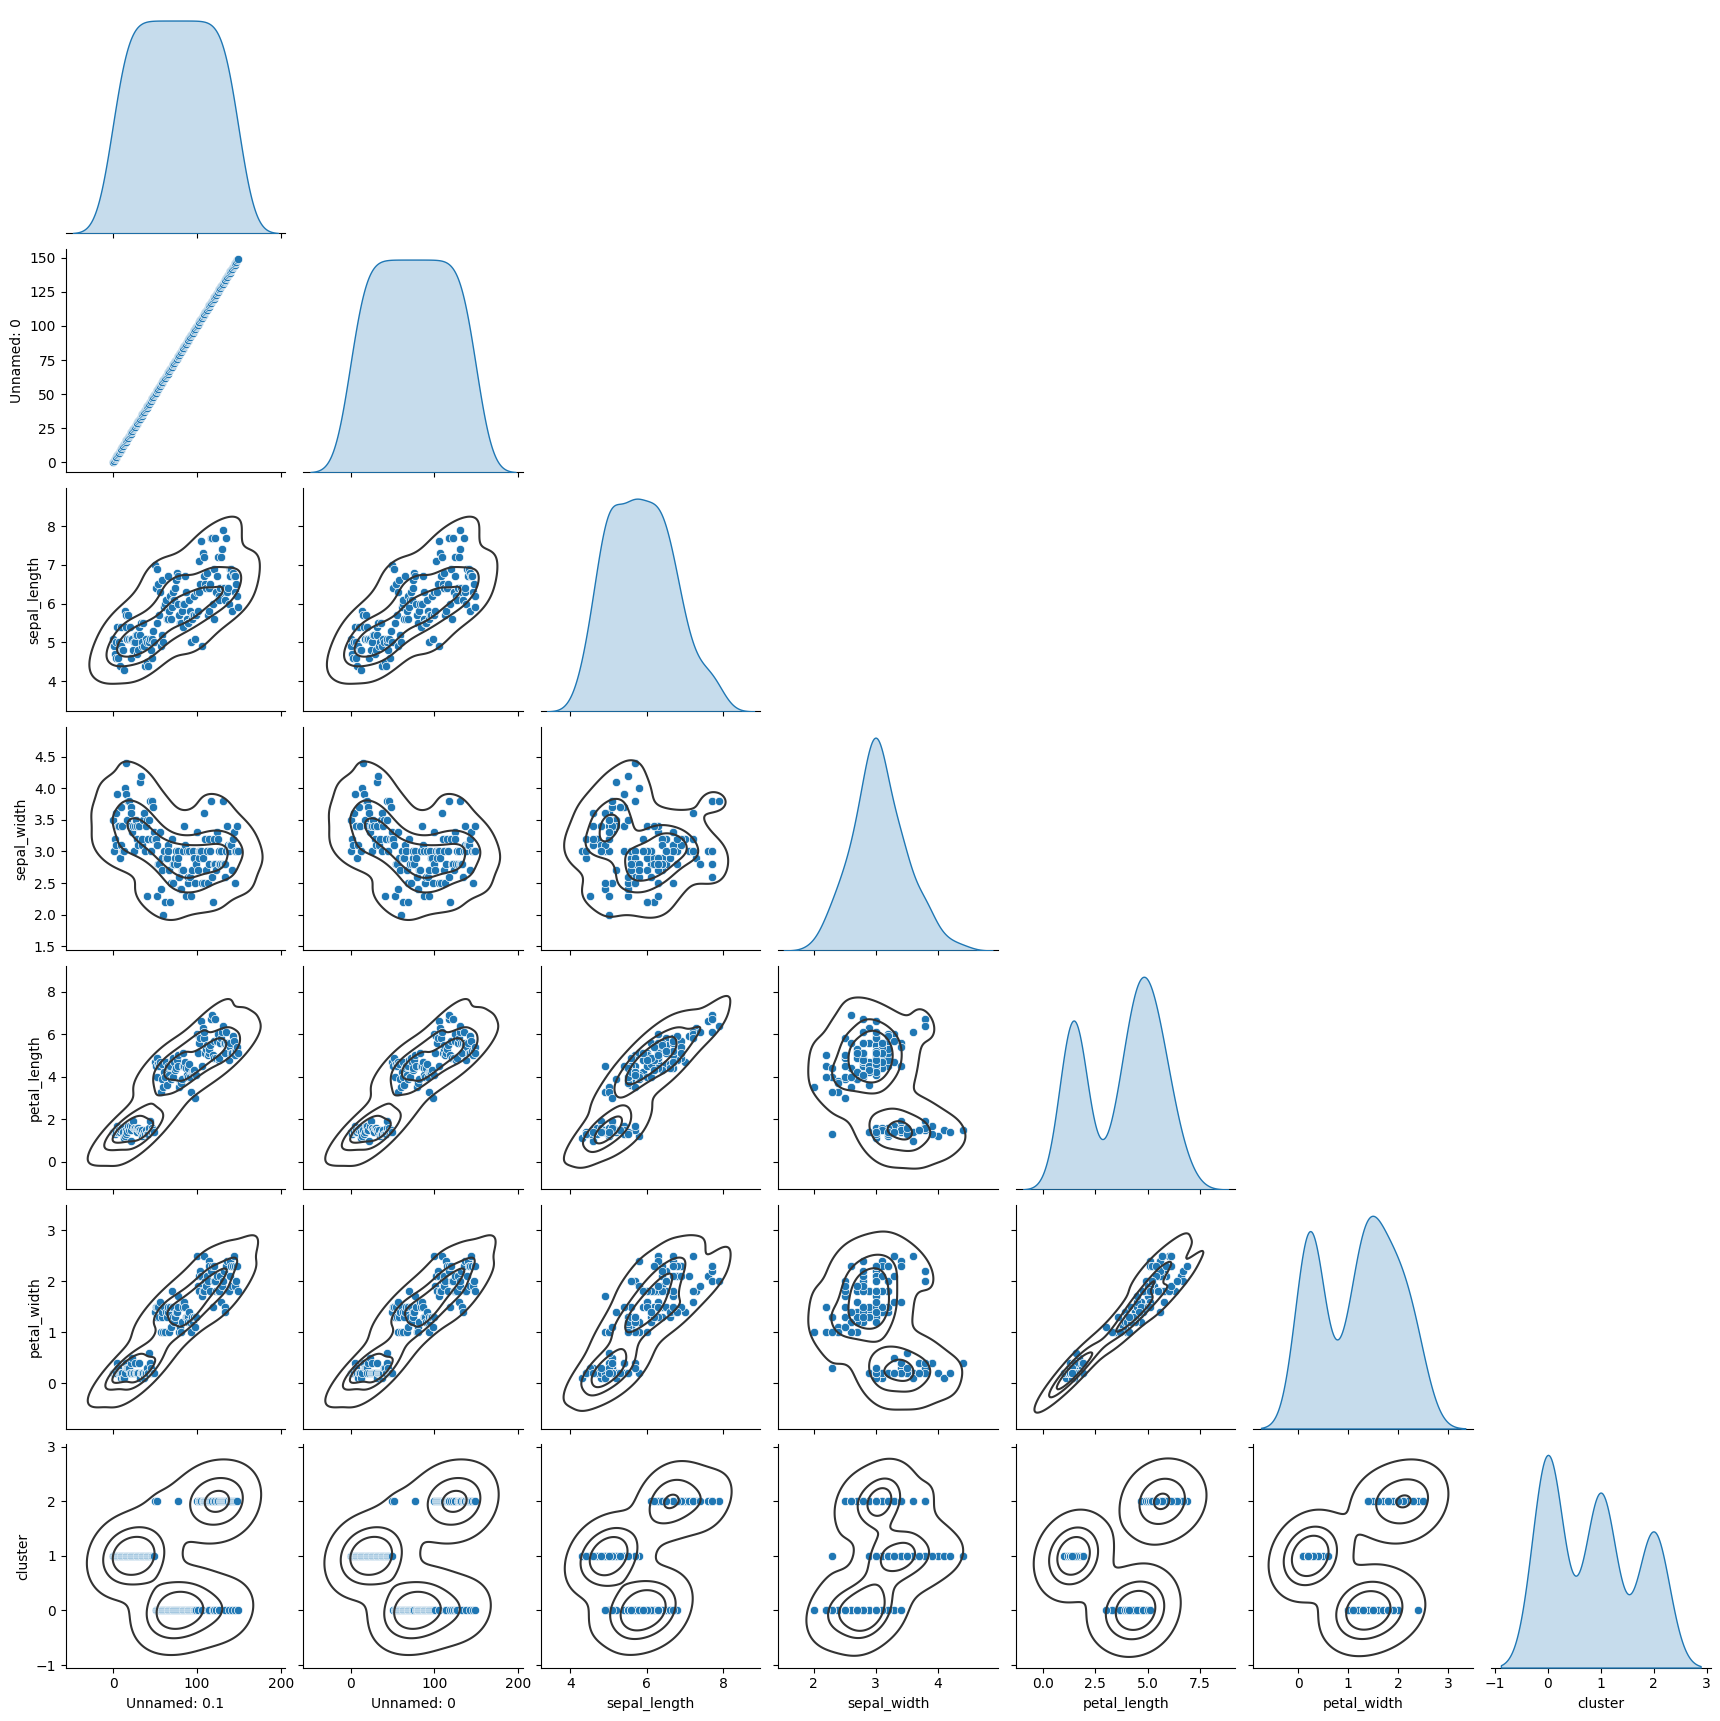

In [ ]:
#Pairplot: Scatterplot of all variabless
g=sns.pairplot(df, corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color= ".2")
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

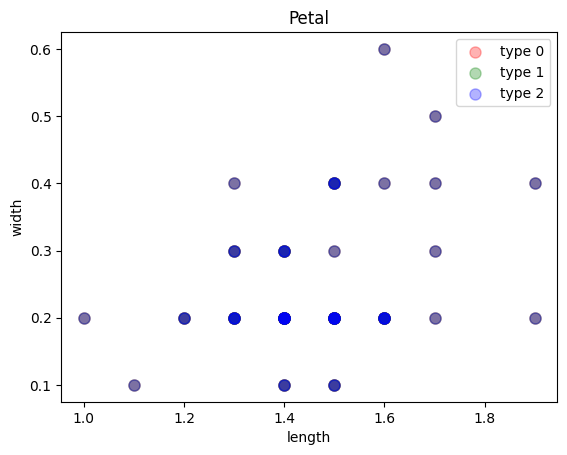

In [ ]:
# Get dataframes for each real cluster
df1= df[df.type==0]
df2=df[df.type==1]
df3=df[df.type==2]

plt.scatter(df1.petal_length, df1.petal_width, label='type 0', c='r',marker='o', s=64, alpha=0.3)
plt.scatter(df1.petal_length, df1.petal_width, label='type 1', c='g',marker='o', s=64, alpha=0.3)
plt.scatter(df1.petal_length, df1.petal_width, label='type 2', c='b',marker='o', s=64, alpha=0.3)

plt.title('Petal')
plt.xlabel('length')
plt.ylabel('width')
plt.legend()
plt.show()



Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

##K=3

In [ ]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
k=3
km= KMeans(n_clusters=k, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
typePredict=km.fit_predict(df[['petal_length','petal_width', 'sepal_length', 'sepal_width']])

# Print estimated cluster of each point in the dataset
typePredict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [ ]:
# Add a new column to the dataset with the cluster information
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
k = 3
km = KMeans(n_clusters=k, n_init="auto")

# Do K-means clustering (assign each point in the dataset to a cluster)
typePredict = km.fit_predict(df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']])

# Add a new column to the dataset with the cluster information
df['cluster'] = typePredict

# Display the updated dataframe
df.tail()



,Unnamed: 0.1,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,type,cluster
145,145,145,6.7,3.0,5.2,2.3,Virginica,2
146,146,146,6.3,2.5,5.0,1.9,Virginica,0
147,147,147,6.5,3.0,5.2,2.0,Virginica,2
148,148,148,6.2,3.4,5.4,2.3,Virginica,2
149,149,149,5.9,3.0,5.1,1.8,Virginica,0


In [ ]:
# Label of the estimated clusters

# Get the unique cluster labels from the DataFrame

typePredict=df['cluster']
# Print the unique cluster labels
print("Labels of the estimated clusters:", typePredict.unique())


Labels of the estimated clusters: [1 2 0]


In [ ]:
# Cluster centroides
centroids = km.cluster_centers_

# Print the centroids
print("Cluster centroids:\n", centroids)


Cluster centroids:
 [[4.39354839 1.43387097 5.9016129  2.7483871 ]
 [5.74210526 2.07105263 6.85       3.07368421]
 [1.462      0.246      5.006      3.428     ]]


In [ ]:
sse = km.inertia_
# Print the SSE
print("Sum of Squared Errors (SSE):", sse)


Sum of Squared Errors (SSE): 78.851441426146


In [ ]:
# The number of iterations required to converge

iterations = km.n_iter_

print("Number of iterations required to converge:", iterations)


Number of iterations required to converge: 4


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

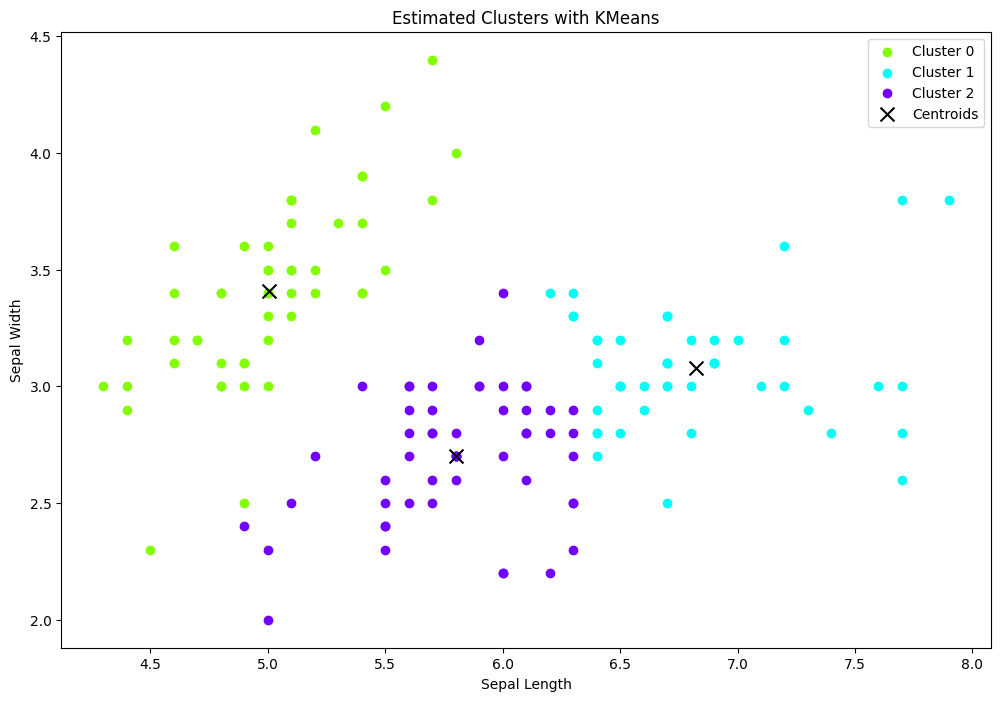

In [ ]:
# Define the number of clusters
k = 3
#k= 2
#k= 4
#k=5

# Perform KMeans clustering and get cluster labels
cluster_labels = km.fit_predict(df[['sepal_length', 'sepal_width']])

# Add cluster labels to DataFrame
df['cluster'] = cluster_labels

# Plot the data points with colors based on the cluster assignment
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = sns.color_palette("hsv", k)

# Scatter plot of the data points
for i in range(k):
    plt.scatter(df[df['cluster'] == i]['sepal_length'],
                df[df['cluster'] == i]['sepal_width'],
                color=colors[i],
                label=f'Cluster {i}')

# Plot the centroids
centroids = km.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], # Access the first two columns for sepal length and width
            color='black',
            marker='x',
            s=100,
            label='Centroids')

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Estimated Clusters with KMeans')
plt.legend()

# Show the plot
plt.show()

## Plot both real and estimated clusters to check for errors

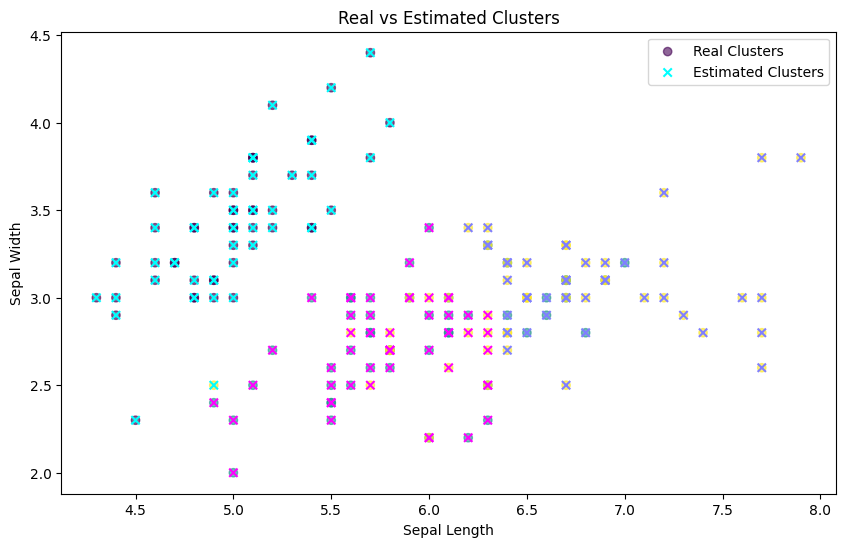

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verifica si la columna 'type' existe
if 'type' in df.columns:
    # Definir colores para los clústeres reales
    colors = sns.color_palette("hsv", len(df['type'].unique()))

    # Graficar los clústeres reales con diferentes colores
    plt.figure(figsize=(10, 6))
    plt.scatter(df['sepal_length'], df['sepal_width'], c=df['type'].astype('category').cat.codes, cmap='viridis', label='Real Clusters', alpha=0.6)

    # Superponer los clústeres estimados con un marcador diferente
    plt.scatter(df['sepal_length'], df['sepal_width'], c=df['cluster'], cmap='cool', marker='x', label='Estimated Clusters')

    # Etiquetas y leyenda
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Real vs Estimated Clusters')
    plt.legend(loc='best')

    # Mostrar el gráfico
    plt.show()
else:
    print("La columna 'type' no existe en el DataFrame.")



##

In [ ]:
#K=2
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
k=2
km= KMeans(n_clusters=k, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
typePredict=km.fit_predict(df[['petal_length','petal_width', 'sepal_length', 'sepal_width']])

# Print estimated cluster of each point in the dataset
typePredict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
#k=4
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
k=4
km= KMeans(n_clusters=k, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
typePredict=km.fit_predict(df[['petal_length','petal_width', 'sepal_length', 'sepal_width']])

# Print estimated cluster of each point in the dataset
typePredict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1,
       3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3], dtype=int32)

In [ ]:
#k=5
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
k=5
km= KMeans(n_clusters=k, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
typePredict=km.fit_predict(df[['petal_length','petal_width', 'sepal_length', 'sepal_width']])

# Print estimated cluster of each point in the dataset
typePredict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 0, 4, 3, 0, 0, 3, 2, 3, 0, 3,
       0, 0, 0, 4, 0, 0, 0, 3, 3, 4, 0, 4, 3, 4, 0, 3, 4, 4, 0, 3, 3, 3,
       0, 4, 4, 3, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4], dtype=int32)

In [ ]:
#k=3
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
k=3
km= KMeans(n_clusters=k, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
typePredict=km.fit_predict(df[['petal_length','petal_width', 'sepal_length', 'sepal_width']])

# Print estimated cluster of each point in the dataset
typePredict


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...



# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

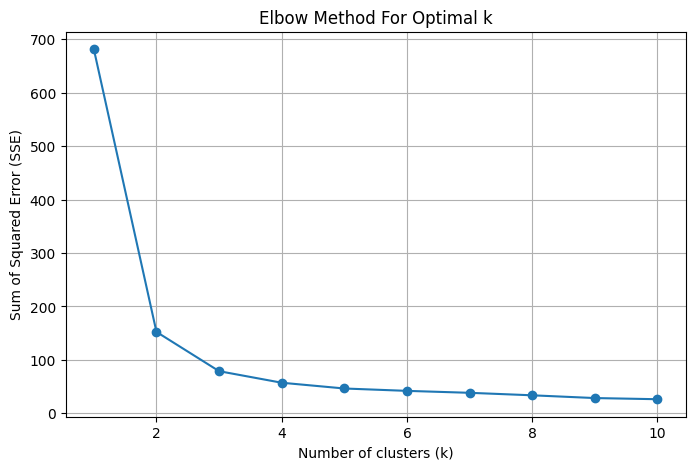

In [ ]:
# Intialize a list to hold sum of squared error (sse)

# Define values of k


# For each k

sse = []

# Definir los valores de k que vamos a probar
k_values = range(1, 11)

# Para cada valor de k, ajustamos el modelo KMeans y calculamos el SSE
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(df[['petal_length','petal_width', 'sepal_length', 'sepal_width']])  # Ajustamos el modelo
    sse.append(kmeans.inertia_)  # Guardamos el SSE (inertia)

# Graficar el SSE para cada valor de k
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


El codo del gráfico se forma en
𝑘=2 o 𝑘=3
lo que indica que el número óptimo de clústeres para el modelo KMeans es probablemente uno de estos valores. Esto sugiere que los datos se agrupan de forma natural en dos o tres clústeres, y agregar más clústeres no mejoraría significativamente la precisión del modelo.

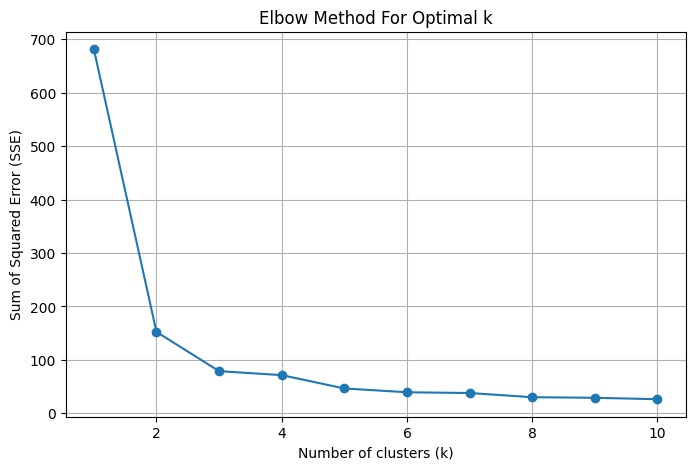

In [ ]:
# Plot sse versus k
sse = []

# Definir los valores de k que vamos a probar
k_values = range(1, 11)

# Para cada valor de k, ajustamos el modelo KMeans y calculamos el SSE
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init="auto")
    kmeans.fit(df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']])  # Ajustar el modelo
    sse.append(kmeans.inertia_)  # Guardar el SSE (inertia)

# Graficar el SSE para cada valor de k
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)

##Conclusiones:

El codo del gráfico se forma en 𝑘=2 o 𝑘=3 lo que indica que el número óptimo de clústeres para el modelo KMeans es probablemente uno de estos valores. Esto sugiere que los datos se agrupan de forma natural en dos o tres clústeres, y agregar más clústeres no mejoraría significativamente la precisión del modelo.

Esto indica que el modelo con 3 clústeres logra una mejora significativa en la agrupación de los datos, mientras que añadir más clústeres no aportaría una reducción importante en el SSE. Además, en casos como el dataset de Iris, sabemos que hay 3 especies de flores.
¿

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k